<a href="https://colab.research.google.com/github/SidharthArya/Deep_Learning_Class_Manit/blob/main/Lab/007_CNN_With_Ensemble_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import tensorflow as tf
from tensorflow.keras import Sequential, Input, Model
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPool2D, Flatten, Dense, Dropout, Reshape, Add, Concatenate

import matplotlib.pyplot as plt

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images = train_images / 255.0

test_images = test_images / 255.0

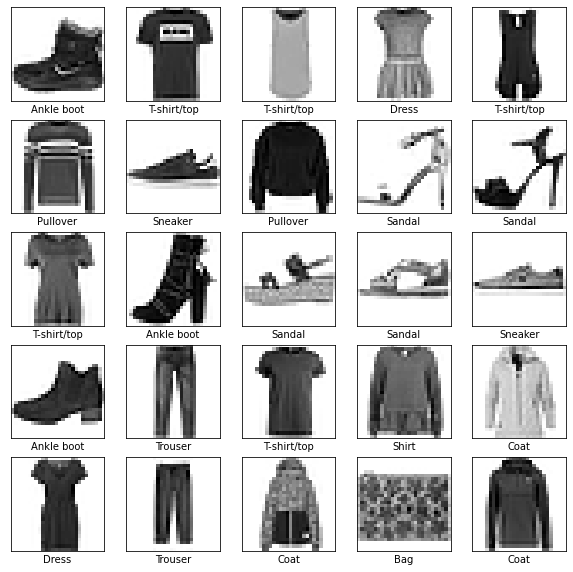

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [6]:
modelA = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

modelA.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
modelA.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [7]:
modelB = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),

    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')

    
])

modelB.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
modelA.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [8]:
modelC = tf.keras.Sequential([

    Reshape((28,28,1), input_shape=(28, 28)),
    Conv2D(32,(3,3)),
    MaxPool2D(),

    BatchNormalization(),

        Conv2D(16, (3,3)),
    MaxPool2D(),

    BatchNormalization(),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(10, activation='softmax')

    
])

modelC.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
modelC.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 13, 13, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 16)        4624      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 16)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 5, 5, 16)         

In [9]:
history = modelA.fit(train_images,train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6322 - accuracy: 0.7801 - val_loss: 0.4152 - val_accuracy: 0.8525
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3815 - accuracy: 0.8624 - val_loss: 0.3785 - val_accuracy: 0.8650
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3379 - accuracy: 0.8760 - val_loss: 0.3813 - val_accuracy: 0.8624
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3113 - accuracy: 0.8860 - val_loss: 0.3530 - val_accuracy: 0.8727
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2967 - accuracy: 0.8910 - val_loss: 0.3600 - val_accuracy: 0.8667


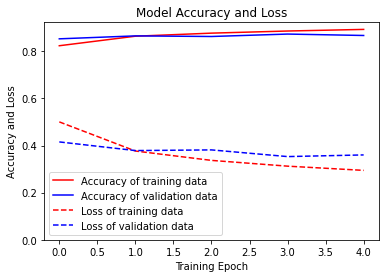

In [10]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

In [11]:
history = modelB.fit(train_images,train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6014 - accuracy: 0.7861 - val_loss: 0.4447 - val_accuracy: 0.8361
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3690 - accuracy: 0.8642 - val_loss: 0.3653 - val_accuracy: 0.8674
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3268 - accuracy: 0.8793 - val_loss: 0.3702 - val_accuracy: 0.8675
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3038 - accuracy: 0.8875 - val_loss: 0.3705 - val_accuracy: 0.8686
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2805 - accuracy: 0.8943 - val_loss: 0.3359 - val_accuracy: 0.8807


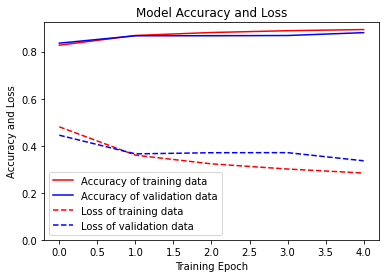

In [12]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

In [13]:
history = modelC.fit(train_images,train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.5307 - accuracy: 0.8103 - val_loss: 0.3956 - val_accuracy: 0.8556
Epoch 2/5
1875/1875 [==============================] - 40s 22ms/step - loss: 0.3027 - accuracy: 0.8884 - val_loss: 0.3254 - val_accuracy: 0.8787
Epoch 3/5
1875/1875 [==============================] - 40s 21ms/step - loss: 0.2581 - accuracy: 0.9059 - val_loss: 0.3047 - val_accuracy: 0.8913
Epoch 4/5
1875/1875 [==============================] - 41s 22ms/step - loss: 0.2275 - accuracy: 0.9164 - val_loss: 0.2849 - val_accuracy: 0.8990
Epoch 5/5
1875/1875 [==============================] - 40s 21ms/step - loss: 0.1997 - accuracy: 0.9255 - val_loss: 0.2824 - val_accuracy: 0.9021


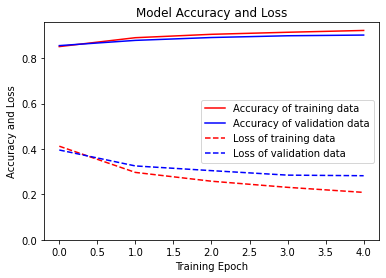

In [14]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()

In [68]:
combine = Sequential([Input((3,10)), Dense(10, activation='softmax')])
combine.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
combine.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 3, 10)             110       
Total params: 110
Trainable params: 110
Non-trainable params: 0
_________________________________________________________________


In [89]:
from tensorflow.keras.layers import concatenate

In [91]:
model_input = Input((28,28))
x1 = modelA(model_input)
x2 = modelB(model_input)
x3 = modelC(model_input)
x = concatenate([x1,x2,x3])
output = Dense(10)(x)

In [92]:
x2.shape

TensorShape([None, 10])

In [93]:
model = Model(model_input, output, name='ensembled')

In [94]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.summary()

Model: "ensembled"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_40 (InputLayer)           [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
sequential (Sequential)         (None, 10)           101770      input_40[0][0]                   
__________________________________________________________________________________________________
sequential_1 (Sequential)       (None, 10)           235146      input_40[0][0]                   
__________________________________________________________________________________________________
sequential_2 (Sequential)       (None, 10)           57754       input_40[0][0]                   
__________________________________________________________________________________________

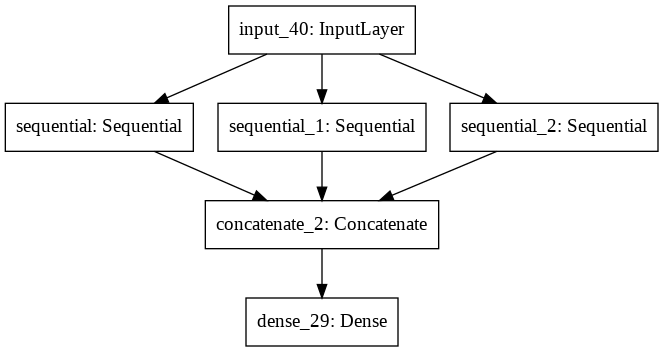

In [95]:
keras.utils.plot_model(model, "my_first_model.png")

In [96]:
history = model.fit(train_images,train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 48s 25ms/step - loss: 1.2294 - accuracy: 0.7416 - val_loss: 0.4967 - val_accuracy: 0.8611
Epoch 2/5
1875/1875 [==============================] - 46s 25ms/step - loss: 0.3513 - accuracy: 0.9024 - val_loss: 0.3387 - val_accuracy: 0.8935
Epoch 3/5
1875/1875 [==============================] - 46s 25ms/step - loss: 0.2521 - accuracy: 0.9220 - val_loss: 0.3274 - val_accuracy: 0.8928
Epoch 4/5
1875/1875 [==============================] - 46s 24ms/step - loss: 0.2147 - accuracy: 0.9297 - val_loss: 0.3298 - val_accuracy: 0.8916
Epoch 5/5
1875/1875 [==============================] - 47s 25ms/step - loss: 0.1921 - accuracy: 0.9373 - val_loss: 0.2987 - val_accuracy: 0.8990


In [ ]:
modelA(train_images).shape

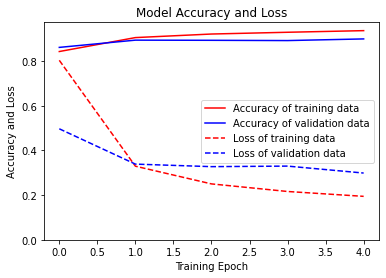

In [97]:
plt.figure(figsize=(6, 4))
plt.plot(history.history['accuracy'], 'r', label='Accuracy of training data')
plt.plot(history.history['val_accuracy'], 'b', label='Accuracy of validation data')
plt.plot(history.history['loss'], 'r--', label='Loss of training data')
plt.plot(history.history['val_loss'], 'b--', label='Loss of validation data')
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and Loss')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.legend()
plt.show()``